I want to know if characteristic colors are different as genre

after clustering color pixels in titles, double cluster main colors in genres

In [ ]:
import pandas as pd
import collections 
import numpy as np
import cv2
from bs4 import BeautifulSoup
from matplotlib import pyplot as plt

from urllib.request import urlopen 
import requests

from sklearn.cluster import KMeans

import os 

from termcolor import colored 

color_cluno=3

#https://www.kaggle.com/shivamb/ideas-for-image-features-and-image-quality

# scrapy from web

save metadata & thumbnail from web

In [2]:
pre="https://comic.naver.com"
url=pre+"/webtoon/weekday.nhn"

# scrapy from url (webtoon title list)
html = urlopen(url)
bs_object = BeautifulSoup(html, "html.parser")


In [4]:
tags = bs_object.find_all('div', attrs={'class': 'thumb'})

imglst=[]
titlelst=[]
urllst=[]
genrelst=[]
for i in tags:
    # from title list
    title_img=i.find("img")["src"]
    title_name=i.find("img")["title"]
    title_url=i.find("a")["href"]
    
    imglst.append(title_img)
    titlelst.append(title_name)
    urllst.append(title_url)
    
    # title page for genre 
    html2 = urlopen(pre+title_url)
    title_object=BeautifulSoup(html2, "html.parser")
    title_object
    
    genre=title_object.find_all("span", attrs={'class': 'genre'})[0].text
    genrelst.append(genre)
    
    #save thumbnail
    with urlopen(title_img) as rd:
        with open('thumbnail/'+title_name+'.jpg','wb') as ot: 
            img = rd.read() 
            ot.write(img) 


In [5]:
urldf=pd.DataFrame(data={"imgsrc":imglst,
                   "titlename":titlelst,
                   "href":title_url,
                   "genre":genrelst})

urldf=urldf.drop_duplicates("titlename")
urldf.head()

,imgsrc,titlename,href,genre
0,https://shared-comic.pstatic.net/thumb/webtoon...,신의 탑,/webtoon/list.nhn?titleId=758145&weekday=sun,"스토리, 판타지"
1,https://shared-comic.pstatic.net/thumb/webtoon...,참교육,/webtoon/list.nhn?titleId=758145&weekday=sun,"스토리, 액션"
2,https://shared-comic.pstatic.net/thumb/webtoon...,뷰티풀 군바리,/webtoon/list.nhn?titleId=758145&weekday=sun,"스토리, 드라마"
3,https://shared-comic.pstatic.net/thumb/webtoon...,파이게임,/webtoon/list.nhn?titleId=758145&weekday=sun,"스토리, 스릴러"
4,https://shared-comic.pstatic.net/thumb/webtoon...,윈드브레이커,/webtoon/list.nhn?titleId=758145&weekday=sun,"스토리, 스포츠"


In [6]:
genredf=urldf["genre"].str.split(",",expand=True)

urldf["genre1"]=genredf[0]
urldf["genre2"]=genredf[1]

In [7]:
urldf["genre1"].value_counts()

스토리     356
에피소드     34
옴니버스     17
Name: genre1, dtype: int64

In [8]:
urldf["genre2"].value_counts()

 로맨스    103
 판타지     92
 드라마     91
 스릴러     44
 액션      40
 개그      12
 일상       9
 스포츠      8
 시대극      5
 감성       3
Name: genre2, dtype: int64

In [12]:
urldf.to_csv("imgdf.csv",index=False)

In [13]:
urldf=pd.read_csv("imgdf.csv", encoding="utf-8")

# image load

image load after thumbnail scraping

In [14]:
img_dir = 'thumbnail/'
imgs = os.listdir(img_dir) 

In [15]:
img_loaded_lst=[]
for img_file in imgs:
    load_img = cv2.imread(img_dir+img_file)
    img_loaded_lst.append(load_img)

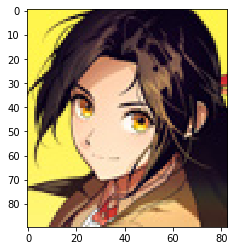

In [16]:
plt.imshow(cv2.cvtColor(img_loaded_lst[0], cv2.COLOR_BGR2RGB))
plt.show()

In [17]:
imgfile_df=pd.DataFrame(data={"img_file":imgs, "img_mat":img_loaded_lst})

imgfile_df["img_file"]=imgfile_df["img_file"].str.replace(".jpg","")
imgfile_df.head()

,img_file,img_mat
0,왕년엔 용사님,"[[[75, 245, 255], [75, 245, 255], [75, 245, 25..."
1,완벽한 가족,"[[[229, 235, 240], [229, 235, 240], [229, 235,..."
2,태권보이,"[[[255, 255, 255], [255, 255, 255], [255, 255,..."
3,랜덤채팅의 그녀!,"[[[205, 205, 205], [205, 205, 205], [207, 205,..."
4,외모지상주의,"[[[255, 255, 255], [255, 255, 255], [254, 254,..."


In [18]:
imgfile_df=imgfile_df.merge(urldf,left_on="img_file",right_on="titlename", how="left")

imgfile_df.head()

,img_file,img_mat,imgsrc,titlename,href,genre,genre1,genre2
0,왕년엔 용사님,"[[[75, 245, 255], [75, 245, 255], [75, 245, 25...",https://shared-comic.pstatic.net/thumb/webtoon...,왕년엔 용사님,/webtoon/list.nhn?titleId=758145&weekday=sun,"스토리, 판타지",스토리,판타지
1,완벽한 가족,"[[[229, 235, 240], [229, 235, 240], [229, 235,...",https://shared-comic.pstatic.net/thumb/webtoon...,완벽한 가족,/webtoon/list.nhn?titleId=758145&weekday=sun,"스토리, 스릴러",스토리,스릴러
2,태권보이,"[[[255, 255, 255], [255, 255, 255], [255, 255,...",https://shared-comic.pstatic.net/thumb/webtoon...,태권보이,/webtoon/list.nhn?titleId=758145&weekday=sun,"스토리, 스포츠",스토리,스포츠
3,랜덤채팅의 그녀!,"[[[205, 205, 205], [205, 205, 205], [207, 205,...",https://shared-comic.pstatic.net/thumb/webtoon...,랜덤채팅의 그녀!,/webtoon/list.nhn?titleId=758145&weekday=sun,"스토리, 드라마",스토리,드라마
4,외모지상주의,"[[[255, 255, 255], [255, 255, 255], [254, 254,...",https://shared-comic.pstatic.net/thumb/webtoon...,외모지상주의,/webtoon/list.nhn?titleId=758145&weekday=sun,"스토리, 드라마",스토리,드라마


# color ~ genre

correlation with thumbnail color and genre.

find thumbnail's main color by clustering

In [19]:
def main_cluster(color_mat, color_cluno): 
    kmeans = KMeans(n_clusters = color_cluno)
    kmeans.fit(color_mat)
    return kmeans

def color_cluster(img_mat, cluno):

    maincolorlst=[]
    for ind,mat in enumerate(img_mat):
        # check data
        if mat is None:
            maincolorlst.append("")
            continue    
        
        # BRG->RGB
        mat_rgb = cv2.cvtColor(mat, cv2.COLOR_BGR2RGB)

        # reshape to list of pixels
        matpixel=mat_rgb.reshape((mat_rgb.shape[0] * mat_rgb.shape[1], 3)) 
        
        # k-means cluster pixels
        kmeans=main_cluster(matpixel, color_cluno)

        maincolorlst.append(kmeans.cluster_centers_.astype(int))

    return maincolorlst
    


clustering pixels about each title 

In [20]:
imgfile_df["main_color"]=color_cluster(imgfile_df["img_mat"], color_cluno)
imgfile_df.head()

,img_file,img_mat,imgsrc,titlename,href,genre,genre1,genre2,main_color
0,왕년엔 용사님,"[[[75, 245, 255], [75, 245, 255], [75, 245, 25...",https://shared-comic.pstatic.net/thumb/webtoon...,왕년엔 용사님,/webtoon/list.nhn?titleId=758145&weekday=sun,"스토리, 판타지",스토리,판타지,"[[142, 96, 69], [245, 221, 130], [33, 19, 32]]"
1,완벽한 가족,"[[[229, 235, 240], [229, 235, 240], [229, 235,...",https://shared-comic.pstatic.net/thumb/webtoon...,완벽한 가족,/webtoon/list.nhn?titleId=758145&weekday=sun,"스토리, 스릴러",스토리,스릴러,"[[79, 69, 69], [240, 232, 225], [154, 138, 137]]"
2,태권보이,"[[[255, 255, 255], [255, 255, 255], [255, 255,...",https://shared-comic.pstatic.net/thumb/webtoon...,태권보이,/webtoon/list.nhn?titleId=758145&weekday=sun,"스토리, 스포츠",스토리,스포츠,"[[242, 228, 200], [77, 29, 23], [144, 133, 134]]"
3,랜덤채팅의 그녀!,"[[[205, 205, 205], [205, 205, 205], [207, 205,...",https://shared-comic.pstatic.net/thumb/webtoon...,랜덤채팅의 그녀!,/webtoon/list.nhn?titleId=758145&weekday=sun,"스토리, 드라마",스토리,드라마,"[[177, 139, 138], [216, 210, 209], [63, 67, 79]]"
4,외모지상주의,"[[[255, 255, 255], [255, 255, 255], [254, 254,...",https://shared-comic.pstatic.net/thumb/webtoon...,외모지상주의,/webtoon/list.nhn?titleId=758145&weekday=sun,"스토리, 드라마",스토리,드라마,"[[249, 242, 234], [17, 17, 31], [181, 156, 152]]"




clustered color array to atomic matrix

In [21]:
genre_color=imgfile_df[["genre2","main_color"]]

#initialize
genre_colors=pd.DataFrame(columns=["genre","main_color"])
#0,1,2
for clno in range(0,color_cluno):
    genre_colors=genre_colors.append(pd.DataFrame(data={"genre":genre_color["genre2"],
                   "main_color":genre_color["main_color"].str[clno]})
      )

#valid value+prep
genre_colors=genre_colors[genre_colors["genre"].str.len()>0]
genre_colors=genre_colors.reset_index(drop=True)
genre_colors["genre"]=genre_colors["genre"].str.strip()

genre_colors.head()

,genre,main_color
0,판타지,"[142, 96, 69]"
1,스릴러,"[79, 69, 69]"
2,스포츠,"[242, 228, 200]"
3,드라마,"[177, 139, 138]"
4,드라마,"[249, 242, 234]"




double clustering from clustered colors of each genre

In [22]:
outcol=["genre_name","main_color"]
outdf=pd.DataFrame(columns=outcol)

for genname in genre_colors["genre"].drop_duplicates():  
    ingenre_colors=genre_colors[genre_colors["genre"]==genname]["main_color"].reset_index(
        drop=True)
    
    color_mat=[]
    
    for ele in ingenre_colors:  
        try: 
            color_mat.append([ele[0],ele[1],ele[2]])
        except: 
            continue

    kmeans_obj=main_cluster(color_mat, 6)
     
    mean_colors=kmeans_obj.cluster_centers_.astype(int)
    
    genre_color_df=pd.DataFrame(data={"main_color":mean_colors.tolist()})
    genre_color_df["genre_name"]=genname
    
    outdf=outdf.append(genre_color_df[outcol])
    
outdf=outdf.reset_index(drop=True)



print genre's clustered color

In [23]:

for mcind,mc in enumerate(outdf["main_color"]):
    
    prt_genrename=outdf["genre_name"][mcind]
    rgbformat='{0};{1};{2}'.format(mc[0],mc[1],mc[2])
    print('\033[38;2;'+rgbformat+'m' +prt_genrename+ '■\033[0m')
    
    try:
        if prt_genrename!=outdf["genre_name"][mcind+1]:
            print("============")
    except:
        continue

판타지■
판타지■
판타지■
판타지■
판타지■
판타지■
스릴러■
스릴러■
스릴러■
스릴러■
스릴러■
스릴러■
스포츠■
스포츠■
스포츠■
스포츠■
스포츠■
스포츠■
드라마■
드라마■
드라마■
드라마■
드라마■
드라마■
로맨스■
로맨스■
로맨스■
로맨스■
로맨스■
로맨스■
액션■
액션■
액션■
액션■
액션■
액션■
일상■
일상■
일상■
일상■
일상■
일상■
시대극■
시대극■
시대극■
시대극■
시대극■
시대극■
개그■
개그■
개그■
개그■
개그■
개그■
감성■
감성■
감성■
감성■
감성■
감성■
